<a href="https://colab.research.google.com/github/ysmnyklmz/Titanik-veri-seti-inceleme/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Titanik gemi enkazından hangi yolcuların kurtulduğunu tahmin eden bir model


Titanic veri setini yüklemek, işlemek, görselleştirmek ve analiz etmek için gerekli kütüphaneleri içe aktarıyoruz.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Model oluşturma, veri bölme, doğrulama ve değerlendirme metrikleri için gerekli olan Scikit-learn kütüphanesinden sınıfları içe aktarıyoruz.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Eğitim (train) ve test veri setlerini CSV dosyalarından okuyarak veri çerçevesi (DataFrame) olarak yüklüyoruz.

In [3]:
df_train = pd.read_csv('/content/train.csv')

df_test = pd.read_csv('/content/test.csv')




Google Colab üzerinde çalışıyorsanız, Google Drive'ı bağlayarak dosyalara erişim sağlıyoruz.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Veri setinin ilk birkaç satırını görüntüleyerek genel yapıyı inceliyoruz.

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Veri setinin ilk birkaç satırını görüntüleyerek genel yapıyı inceliyoruz.

In [7]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


Eğitim ve test veri setlerini birleştiriyoruz. Bu, veri ön işleme aşamasını her iki veri setine aynı anda uygulamayı kolaylaştırır.

In [9]:
df = pd.concat([df_train , df_test])

Sayısal sütunları seçip korelasyon matrisini hesaplıyoruz. Bu, değişkenler arasındaki ilişkileri incelemek için kullanılır.

In [10]:
numeric_columns=df.select_dtypes(include=['number'])

In [11]:
numeric_columns.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


Kategorik değişkenlerin özet istatistiklerini görüntülüyoruz.

In [12]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


Yaş dağılımını genel ve hayatta kalan yolcular özelinde görselleştiriyoruz.

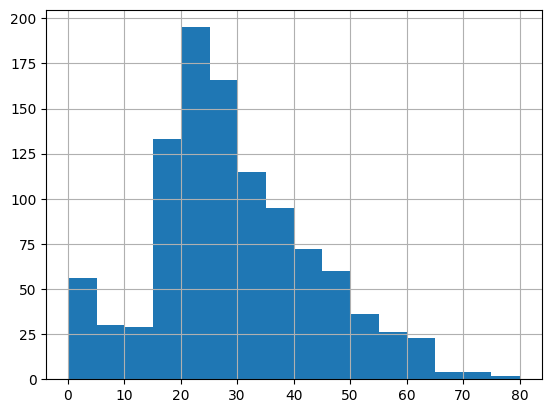

In [13]:
df['Age'].hist(bins=16);

<Axes: >

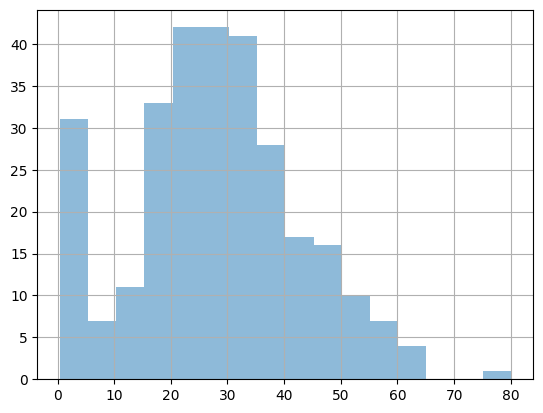

In [14]:
df[df['Survived'] == 1]['Age'].hist(bins=16, alpha=.5)

Cinsiyete göre hayatta kalma oranlarını hesaplıyor ve görselleştiriyoruz.

In [15]:
df['Survived'].groupby(df['Sex']).value_counts(normalize=True)

Sex     Survived
female  1.0         0.742038
        0.0         0.257962
male    0.0         0.811092
        1.0         0.188908
Name: proportion, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

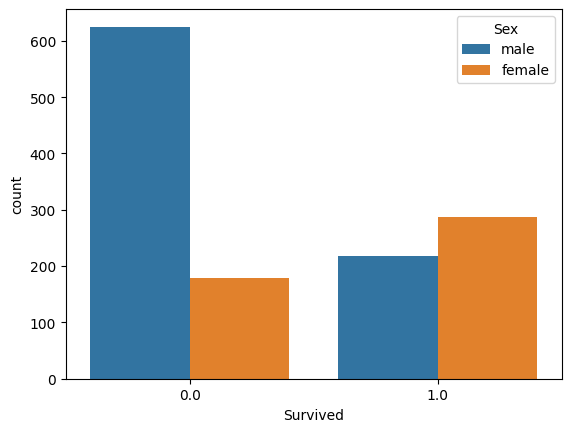

In [16]:
sns.countplot(x='Survived', hue='Sex',data=df)

Yolcu sınıflarını inceliyor, sınıfa göre hayatta kalma oranlarını analiz ediyor ve görselleştiriyoruz.

In [17]:
df['Pclass'].unique()

array([3, 1, 2])

In [18]:
df['Survived'].groupby(df['Pclass']).value_counts(normalize=True)

Pclass  Survived
1       1.0         0.629630
        0.0         0.370370
2       0.0         0.527174
        1.0         0.472826
3       0.0         0.757637
        1.0         0.242363
Name: proportion, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

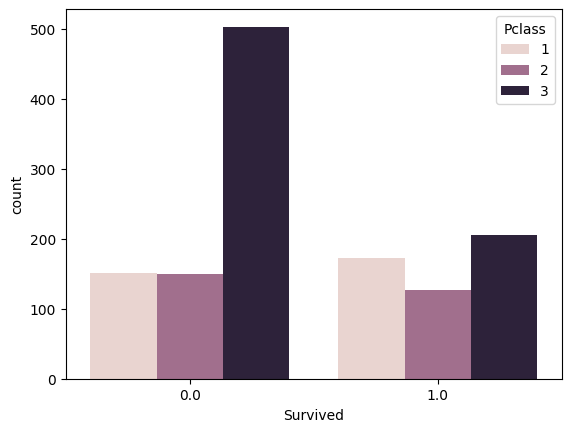

In [19]:
sns.countplot(x='Survived', hue='Pclass',data=df)

Birinci sınıfta seyahat eden ve hayatta kalan erkek ve kadın yolcuları ayrı ayrı analiz ediyoruz.

In [20]:
df_2=df[(df['Survived'] == 1) & (df['Pclass'] == 1) & (df['Sex'] == 'male')]

In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 23 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  45 non-null     int64  
 1   Survived     45 non-null     float64
 2   Pclass       45 non-null     int64  
 3   Name         45 non-null     object 
 4   Sex          45 non-null     object 
 5   Age          40 non-null     float64
 6   SibSp        45 non-null     int64  
 7   Parch        45 non-null     int64  
 8   Ticket       45 non-null     object 
 9   Fare         45 non-null     float64
 10  Cabin        39 non-null     object 
 11  Embarked     45 non-null     object 
dtypes: float64(3), int64(4), object(5)
memory usage: 4.6+ KB


In [22]:
df_2=df[(df['Survived'] == 1) & (df['Pclass'] == 1) & (df['Sex'] == 'female')]

In [23]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 1 to 887
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  91 non-null     int64  
 1   Survived     91 non-null     float64
 2   Pclass       91 non-null     int64  
 3   Name         91 non-null     object 
 4   Sex          91 non-null     object 
 5   Age          82 non-null     float64
 6   SibSp        91 non-null     int64  
 7   Parch        91 non-null     int64  
 8   Ticket       91 non-null     object 
 9   Fare         91 non-null     float64
 10  Cabin        78 non-null     object 
 11  Embarked     89 non-null     object 
dtypes: float64(3), int64(4), object(5)
memory usage: 9.2+ KB


Yaşa göre hayatta kalma durumunu istiflenmiş histogram ve KDE (yoğunluk) grafiği ile görselleştiriyoruz.

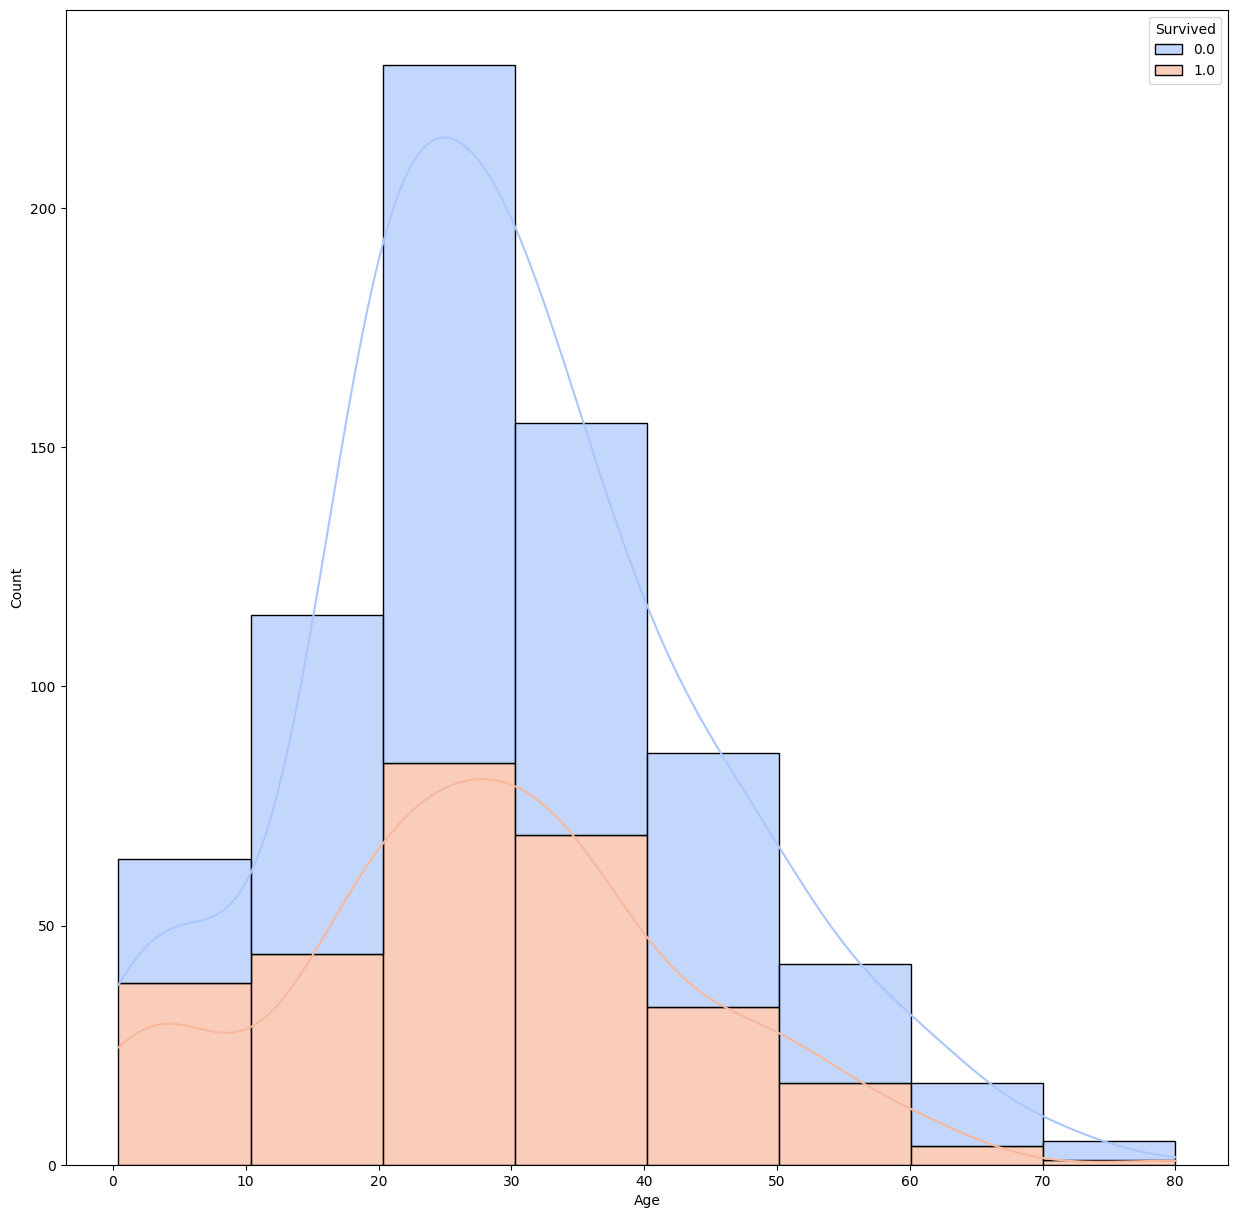

In [24]:
plt.figure(figsize=(15, 15))
df_3 = df.reset_index(drop=True)
sns.histplot(data=df_3, x='Age', hue='Survived', multiple='stack', kde=True, palette='coolwarm', bins=8, alpha=.7)
plt.show()

Kardeş/eş sayısına (SibSp) göre hayatta kalma oranlarını analiz ediyoruz.

In [25]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

<Axes: xlabel='Survived', ylabel='count'>

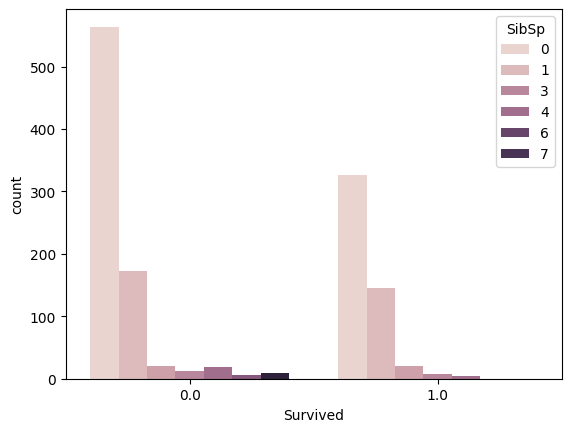

In [26]:
sns.countplot(x='Survived', hue='SibSp',data=df)


In [27]:
df['Survived'].groupby(df['SibSp']).value_counts(normalize=True)

SibSp  Survived
0      0.0         0.654605
       1.0         0.345395
1      1.0         0.535885
       0.0         0.464115
2      0.0         0.535714
       1.0         0.464286
3      0.0         0.750000
       1.0         0.250000
4      0.0         0.833333
       1.0         0.166667
5      0.0         1.000000
8      0.0         1.000000
Name: proportion, dtype: float64

In [28]:
df['Survived'].groupby(df['SibSp']).value_counts(normalize=False)

SibSp  Survived
0      0.0         398
       1.0         210
1      1.0         112
       0.0          97
2      0.0          15
       1.0          13
3      0.0          12
       1.0           4
4      0.0          15
       1.0           3
5      0.0           5
8      0.0           7
Name: count, dtype: int64

In [29]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6, 9])

In [30]:
df['Survived'].groupby(df['Parch']).value_counts(normalize=True)

Parch  Survived
0      0.0         0.656342
       1.0         0.343658
1      1.0         0.550847
       0.0         0.449153
2      0.0         0.500000
       1.0         0.500000
3      1.0         0.600000
       0.0         0.400000
4      0.0         1.000000
5      0.0         0.800000
       1.0         0.200000
6      0.0         1.000000
Name: proportion, dtype: float64

In [31]:
df['Survived'].groupby(df['Parch']).value_counts(normalize=False)


Parch  Survived
0      0.0         445
       1.0         233
1      1.0          65
       0.0          53
2      0.0          40
       1.0          40
3      1.0           3
       0.0           2
4      0.0           4
5      0.0           4
       1.0           1
6      0.0           1
Name: count, dtype: int64

In [32]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [33]:
df['Embarked'].unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [34]:
df['Survived'].groupby(df['Embarked']).value_counts(normalize=True)


Embarked  Survived
C         1.0         0.553571
          0.0         0.446429
Q         0.0         0.610390
          1.0         0.389610
S         0.0         0.663043
          1.0         0.336957
Name: proportion, dtype: float64

In [35]:
df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
413,"Spector, Mr. Woolf"
414,"Oliva y Ocana, Dona. Fermina"
415,"Saether, Mr. Simon Sivertsen"
416,"Ware, Mr. Frederick"


Yolcu isimlerinden unvanları çıkarıyor ve benzer unvanları birleştirerek daha az kategoriyle çalışmayı sağlıyoruz.

In [36]:
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.')

In [37]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [38]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'],'Mr')

In [39]:
df[df['Name'].str.contains('Capt', case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
745,746,0.0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,Mr


In [40]:
df[df['Name'].str.contains('Crosby', case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
540,541,1.0,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.00,B22,S,Miss
745,746,0.0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S,Mr
305,1197,NaN,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.55,B26,S,Mrs


Eksik yaş değerlerini, unvana göre gruplandırılmış ortalama yaşlarla dolduruyoruz.

In [41]:
df['Age'].groupby(df['Title']).mean()

,Age
Title,
Master,5.482642
Miss,21.824366
Mr,32.811056
Mrs,36.971264


In [42]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))

In [43]:
df['Age'].isnull().sum()

0

Eksik ücret değerlerini mod (en sık görülen değer) ile dolduruyoruz.

In [44]:
df.Fare.describe()

,Fare
count,1308.000000
mean,33.295479
std,51.758668
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


In [45]:
df[df.Fare>512]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
343,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs


In [46]:
df.Fare.median()

14.4542

In [47]:
df['Fare'].mode()[0]

8.05

In [48]:
df.Fare.mean()


33.29547928134557

In [49]:
df['Fare'].fillna(df['Fare'].mode()[0],inplace=True)

<ipython-input-49-b38f1dd90478>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mode()[0],inplace=True)


In [50]:
df.Fare.isnull().sum()

0

Eksik kalkış limanı (Embarked) değerlerini dolduruyoruz.

In [51]:
df['Embarked'].fillna(df['Fare'].mode(),inplace=True)


<ipython-input-51-b937cfa312d6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Fare'].mode(),inplace=True)


In [52]:
df.Embarked.isnull().sum()

2

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


Hedef değişkeni (Survived) ayırıyoruz ve model için bağımsız değişkenlerden gereksiz sütunları çıkarıyoruz.

In [54]:
y=df['Survived']
X=df.drop(['Survived','PassengerId','Name','Ticket','Cabin'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1307 non-null   object 
 7   Title     1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


Kategorik değişkenleri one-hot encoding yöntemiyle sayısal verilere dönüştürüyoruz.

In [56]:
X=pd.get_dummies(X,drop_first=True)

In [57]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,22.0,1,0,7.2500,True,False,True,False,True,False
1,1,38.0,1,0,71.2833,False,False,False,False,False,True
2,3,26.0,0,0,7.9250,False,False,True,True,False,False
3,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,3,35.0,0,0,8.0500,True,False,True,False,True,False


In [58]:
X.isnull().sum()

,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_male,0
Embarked_Q,0
Embarked_S,0
Title_Miss,0
Title_Mr,0


In [59]:
df_train.shape

(891, 12)

Eğitim ve test veri setlerini ayırıyoruz.

In [60]:
X_train=X[:891]
X_test=X[891:]
y_train=y[:891]
y_test=y[891:]

In [61]:
y_test.head()

,Survived
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [62]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,True,True,False,False,True,False
1,3,47.0,1,0,7.0000,False,False,True,False,False,True
2,2,62.0,0,0,9.6875,True,True,False,False,True,False
3,3,27.0,0,0,8.6625,True,False,True,False,True,False
4,3,22.0,1,1,12.2875,False,False,True,False,False,True


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
#accuaracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

Birden fazla model üzerinde deneme yaparak en iyi performansı gösteren modeli seçmek için bir fonksiyon tanımlıyoruz. Her modelin doğruluk, karmaşıklık matrisi ve sınıflandırma raporlarını hesaplıyoruz.

In [64]:
def model_classification(X,y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    models = [GaussianNB(),BernoulliNB(),LogisticRegression(),RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(n_neighbors=5)]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("-"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    models=pd.DataFrame({
        'Model':['GaussianNB','BernoulliNB','LogisticRegression','RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier'],
        'Score':results})
    print(models.sort_values(by='Score', ascending=False, ignore_index=True))
    return best_model,max(results), confusion_matrix(model_predict,y_test)

In [65]:
model_classification(X_train,y_train)

Model:  GaussianNB()
Model Accuracy:  0.7947761194029851
Model Confusion Matrix:  [[132  30]
 [ 25  81]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       162
         1.0       0.73      0.76      0.75       106

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.79      0.80       268

--------------------------------------------------
Model:  BernoulliNB()
Model Accuracy:  0.7947761194029851
Model Confusion Matrix:  [[134  32]
 [ 23  79]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       166
         1.0       0.71      0.77      0.74       102

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.80      0.79      0.80       268

--------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:  RandomForestClassifier()
Model Accuracy:  0.8059701492537313
Model Confusion Matrix:  [[134  29]
 [ 23  82]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.85      0.82      0.84       163
         1.0       0.74      0.78      0.76       105

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

--------------------------------------------------
Model:  GradientBoostingClassifier()
Model Accuracy:  0.8208955223880597
Model Confusion Matrix:  [[142  33]
 [ 15  78]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.90      0.81      0.86       175
         1.0       0.70      0.84      0.76        93

    accuracy                           0.82       268
   macro avg       0.80      0.83      0.81       268
weighted avg       0.83      0.82      0.82     

(GradientBoostingClassifier(),
 0.8208955223880597,
 array([[130,  50],
        [ 27,  61]]))